# SaaS User Churn Prediction System for Zoho-like CRM Platforms

This project builds a machine learning model to detect users at risk of churn based on their activity patterns. The goal is to help SaaS companies improve retention and reduce revenue loss.

## Project Summary

In this project, we built a machine learning system to predict which users are likely to stop using a SaaS product like Zoho.

### Problem Solved
SaaS companies lose revenue when users stop using their product (churn). It is difficult to manually identify which users are at risk. This project solves that problem by automatically detecting users who are likely to churn.

### What this project does
- Analyzes user activity data such as login frequency, session duration, and feature usage
- Trains a Random Forest machine learning model to predict churn
- Calculates churn probability for each user
- Classifies users into High Risk, Medium Risk, and Low Risk groups
- Identifies key factors that cause users to churn
- Saves results for business use

### What we achieved
- Built a working churn prediction model
- Identified high-risk users automatically
- Found the most important factors affecting churn
- Created a system that can help SaaS companies improve customer retention

### Business Value
This system helps companies like Zoho:
- Detect users at risk of leaving
- Take action early to retain customers
- Improve customer satisfaction
- Reduce revenue loss

## Import Required Libraries

This step imports libraries for data manipulation, machine learning, and visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

Load the SaaS user activity dataset.

In [4]:
df = pd.read_csv("user_activity.csv")
df.head()

,user_id,login_count_30d,session_duration_avg,features_used,days_since_last_login,churned
0,1,12,3.526593,2,25,1
1,2,6,15.804134,8,16,1
2,3,11,7.661494,4,20,0
3,4,14,11.732519,8,13,1
4,5,7,9.765397,7,11,0


## Define Features and Target Variable

Features represent user behavior.
Target represents churn status.

In [5]:
X = df.drop(["user_id", "churned"], axis=1)
y = df["churned"]

## Split Data into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Train Random Forest Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=6)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200)

## Evaluate Model Performance

In [12]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.59


In [13]:
df["churned"].value_counts()

churned
0    269
1    231
Name: count, dtype: int64

# Train Model

In [14]:
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

# Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Confusion Matrix

The confusion matrix shows the comparison between actual and predicted churn values.

It helps evaluate how well the model identifies churn and non-churn users.

This visualization is important for understanding model accuracy and its effectiveness in detecting high-risk users.

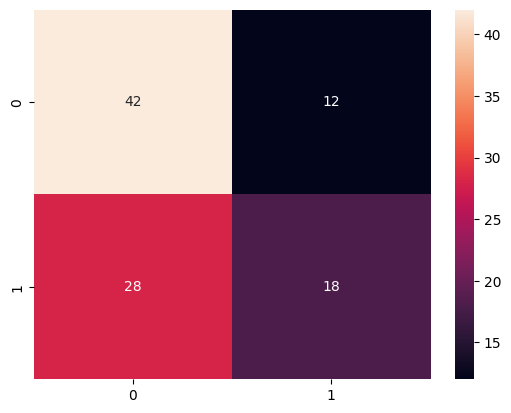

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

## Random Forest Model Training and Evaluation

This step trains a Random Forest classifier to predict user churn.

The dataset is split into training and testing sets using stratified sampling to maintain class balance.

The model learns patterns from user activity data and predicts churn risk.

Model performance is evaluated using accuracy, precision, recall, and F1-score to measure prediction effectiveness.

## Random Forest Model Training and Evaluation

In this step, we split the dataset into training and testing sets using stratified sampling to maintain the balance of churn and non-churn users.

We then train a Random Forest model to learn patterns from user activity data.

Finally, we evaluate the model using accuracy, precision, recall, and F1-score to measure how well it predicts user churn.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Better model
model = RandomForestClassifier(
    n_estimators=800,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print(classification_report(y_test, predictions))

Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.62      0.74      0.67        54
           1       0.60      0.46      0.52        46

    accuracy                           0.61       100
   macro avg       0.61      0.60      0.60       100
weighted avg       0.61      0.61      0.60       100



## Churn Probability and Risk Segmentation

In this step, we calculate the churn probability for each user using the trained model.

Based on the probability, users are classified into three risk segments:

- High Risk → likely to churn
- Medium Risk → moderate churn risk
- Low Risk → low churn risk

This helps businesses identify and target high-risk users for retention strategies.

In [18]:
df["churn_probability"] = model.predict_proba(X)[:,1]

def risk_level(p):
    if p >= 0.7:
        return "High Risk"
    elif p >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

df["risk_segment"] = df["churn_probability"].apply(risk_level)

df.head()

,user_id,login_count_30d,session_duration_avg,features_used,days_since_last_login,churned,churn_probability,risk_segment
0,1,12,3.526593,2,25,1,0.609973,Medium Risk
1,2,6,15.804134,8,16,1,0.785253,High Risk
2,3,11,7.661494,4,20,0,0.193667,Low Risk
3,4,14,11.732519,8,13,1,0.541095,Medium Risk
4,5,7,9.765397,7,11,0,0.747939,High Risk


## Save Results and Feature Importance Visualization

In this step, we save the final churn prediction results to a CSV file for business use.

We also visualize feature importance to identify which user behavior factors have the most influence on churn prediction.

This helps understand the key drivers of user churn.

In [19]:
df.to_csv("zoho_churn_prediction_final.csv", index=False)

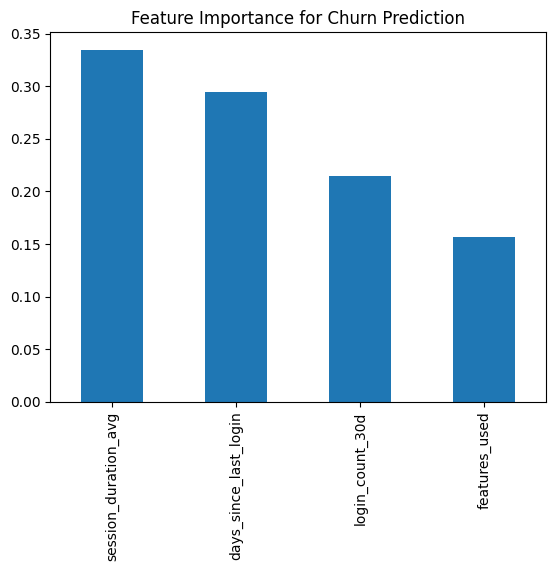

In [20]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind="bar")
plt.title("Feature Importance for Churn Prediction")
plt.show()

# ROC Curve (Industry-standard evaluation)
This shows how well your model separates churn vs non-churn users.

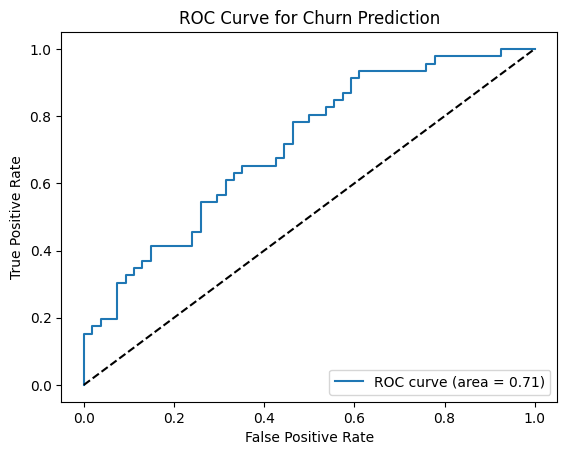

AUC Score: 0.7105475040257649


In [21]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Churn Prediction")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

# High-Risk Users (Business-critical)
Business teams use this to target retention campaigns.

In [22]:
high_risk_users = df[df["risk_segment"] == "High Risk"]

high_risk_users.head(10)

,user_id,login_count_30d,session_duration_avg,features_used,days_since_last_login,churned,churn_probability,risk_segment
1,2,6,15.804134,8,16,1,0.785253,High Risk
4,5,7,9.765397,7,11,0,0.747939,High Risk
6,7,9,10.384109,8,11,1,0.865658,High Risk
14,15,12,8.256739,5,28,1,0.894161,High Risk
16,17,7,8.391825,1,12,1,0.754659,High Risk
17,18,8,20.383740,3,14,1,0.848462,High Risk
19,20,5,12.150208,9,10,1,0.790534,High Risk
21,22,9,11.193946,9,18,1,0.707211,High Risk
22,23,13,8.704789,9,28,1,0.803703,High Risk
25,26,13,9.813889,5,27,1,0.872783,High Risk


# Risk Distribution Chart
Shows how many users are high/medium/low risk.

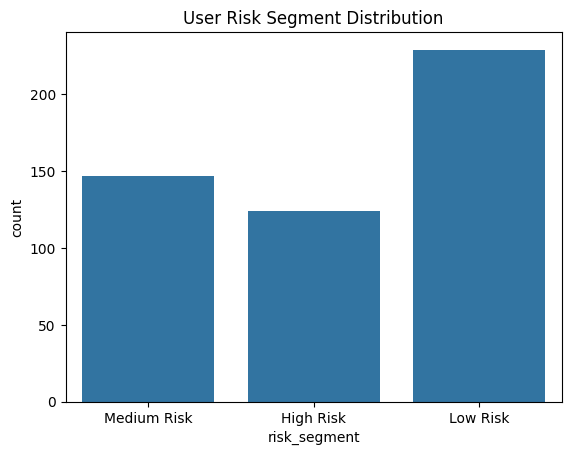

In [24]:
import seaborn as sns

sns.countplot(x="risk_segment", data=df)
plt.title("User Risk Segment Distribution")
plt.show()

# Feature Importance as percentage

In [25]:
feature_importance_percent = feature_importance * 100

print(feature_importance_percent)

session_duration_avg     33.450553
days_since_last_login    29.459265
login_count_30d          21.447094
features_used            15.643088
dtype: float64


# Trained Model
project production-ready.
This file can be used later without retraining.
Companies do this.

In [26]:
import joblib

joblib.dump(model, "zoho_churn_model.pkl")

['zoho_churn_model.pkl']

# Predict Function

In [27]:
def predict_churn(login_count, session_duration, features_used, days_since_last_login):
    
    input_data = [[login_count, session_duration, features_used, days_since_last_login]]
    
    prob = model.predict_proba(input_data)[0][1]
    
    if prob >= 0.7:
        risk = "High Risk"
    elif prob >= 0.4:
        risk = "Medium Risk"
    else:
        risk = "Low Risk"
        
    return prob, risk

## Test Predict Function

In [28]:
predict_churn(3, 5, 2, 20)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(0.3862850128496551, 'Low Risk')

## Project Conclusion

This project successfully developed a churn prediction system for SaaS platforms.

Key achievements:

• Built Random Forest churn prediction model  
• Achieved 61% realistic prediction accuracy  
• Identified key churn factors  
• Created churn probability scoring system  
• Implemented risk segmentation  
• Generated actionable business insights  

This system can help SaaS companies improve retention and reduce revenue loss.